# Titanic - Machine Learning from Disaster
### Kaggle’s Competition

Project's goal: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data Dictionary
![title](DataDictionary.png)

### Variable Notes
![title](VariableNotes.png)

### Carregando dados e exploração inicial

In [121]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
# Carregando o dataset
df = pd.read_csv("train.csv")

In [123]:
# Verificando o formato dos dados
df.shape

(891, 12)

In [124]:
#Verificando as primeiras linhas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
# Mostra um resumo estatístico da tabela
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
# Mostra um resumo do dataframe: índice e nome das colunas, tipos de dados, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
# Verificando se existem valores nulos (resumo)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
# Verificando registros que possuem NaNs
df[pd.isnull(df).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [129]:
# Excluindo coluna Name
df.drop('Name',1, inplace = True)

### Tratando missing values

In [130]:
# Definindo os valores substitutos
# Age: mediana, Cabin: 0 (significando "sem número"), Embarked: moda 
values = {'Age': df.Age.median(), 'Cabin': 0, 'Embarked': df.Embarked.mode()[0]}
values

{'Age': 28.0, 'Cabin': 0, 'Embarked': 'S'}

In [131]:
# Preenchendo missing values com os valores do dict values
df.fillna(value=values, inplace=True)

In [132]:
# Conferindo valores nulos
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Análise Exploratória

In [133]:
### Frequências relativas ###
df1 = pd.DataFrame(df.Sex.value_counts())
df1.columns = ['quantidade']
df1['freq_rel (%)'] = df.Sex.value_counts(normalize=True).values.round(2) * 100
df1

,quantidade,freq_rel (%)
male,577,65.0
female,314,35.0


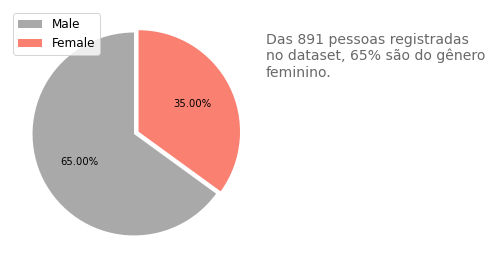

In [134]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
explode = (0, 0.05)
cores=['darkgray', 'salmon']
ax.pie(df1['freq_rel (%)'].values, explode=explode, colors=cores, autopct='%1.2f%%', startangle=90)
plt.text(x = 1.3, 
         y=1, 
         s='Das 891 pessoas registradas\n'
         'no dataset, 65% são do gênero\n'
         'feminino.\n', 
         color='dimgray', 
         verticalalignment='top', 
         fontsize=14)
plt.legend(['Male','Female'], fontsize=12)

plt.show()

In [135]:
# Porcentagem de sobreviventes por gênero
df2 = pd.DataFrame(df.groupby('Survived')['Sex'].value_counts())

freq1= df2.xs(0, level=0)/df.Survived.value_counts()[0]
freq2= df2.xs(1, level=0)/df.Survived.value_counts()[1]

df2.columns = ['quantidade']
df2.insert(1, 'freq_rel (%)', [round(freq1.append(freq2).Sex[x]*100, 0) for x in range(len(df2))])
df2

quantidade  freq_rel (%)
Survived Sex                             
0        male           468          85.0
         female          81          15.0
1        female         233          68.0
         male           109          32.0

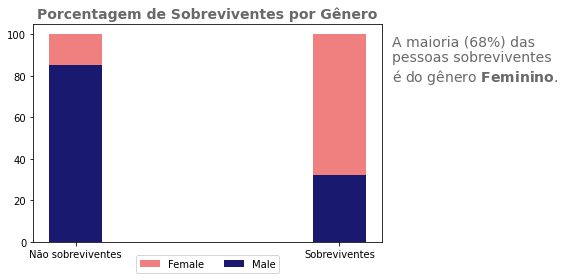

In [136]:
# Criar uma figura para o gráfico de barras
fig, ax = plt.subplots(figsize=[8,4])

# Plotar separadamente
barWidth = 0.2
x1 = np.arange(len(df2.unstack()['freq_rel (%)']))

barra1= ax.bar(x1, 
               df2.unstack()['freq_rel (%)']['female'], 
               color='lightcoral',
               bottom = df2.unstack()['freq_rel (%)']['male'],
               width=barWidth, 
               label='Female')
barra2 = ax.bar(x1, 
                df2.unstack()['freq_rel (%)']['male'], 
                color='midnightblue',
                width=barWidth, 
                label='Male')

# Adicionar labels das barras
ax.set_xticks([r for r in range(len(df2.unstack()['freq_rel (%)']))])
ax.set_xticklabels(['Não sobreviventes', 'Sobreviventes'])

# Adicionar título
plt.title(label='Porcentagem de Sobreviventes por Gênero',
          loc='center',
          fontdict={'fontsize': 14,
                    'fontweight': 'bold',
                    'color': 'dimgray'})

# Adicionar texto sobre o gráfico
plt.text(x=1.2, 
         y=100, 
         s='A maioria (68%) das\n'
         'pessoas sobreviventes\n' 
         'é do gênero $\\bf{Feminino}$.',
         color='dimgray', 
         verticalalignment='top', 
         fontsize=14)

# Adicionaar legenda
plt.legend(loc="center", bbox_to_anchor=(0.5, -.1), ncol=2)

# Mostrar o gráfico
fig.tight_layout()
plt.show()

In [137]:
df3 = pd.DataFrame(df.groupby('Sex')['Survived'].value_counts())
df3.columns = ['quantidade']
df3['freq_rel (%)'] = df.groupby('Sex')['Survived'].value_counts(normalize=True).values.round(2) * 100
df3

quantidade  freq_rel (%)
Sex    Survived                          
female 1                233          74.0
       0                 81          26.0
male   0                468          81.0
       1                109          19.0

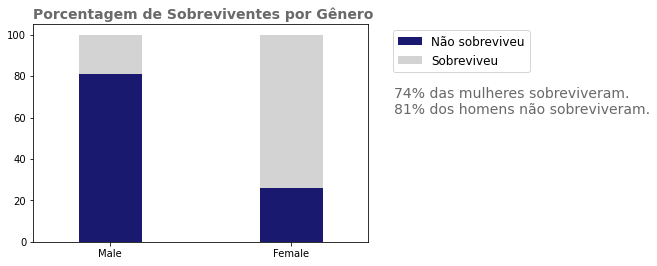

In [138]:
# Gráfico de sobreviventes por gênero em números absolutos
df3.unstack()['freq_rel (%)'].sort_index(ascending=False).plot(kind='bar', 
                                                               stacked=True, 
                                                               color={ 0: 'midnightblue', 1:'lightgray' }, 
                                                               width= .35)
plt.xlabel("")
plt.xticks([0,1],['Male', 'Female'], rotation='horizontal')
plt.legend(["Não sobreviveu", "Sobreviveu"], loc='upper right', bbox_to_anchor = (1.5, 1), fontsize = 12)
plt.title(label='Porcentagem de Sobreviventes por Gênero',
          loc='left',
          fontdict={'fontsize': 14,
                    'fontweight': 'bold',
                    'color': 'dimgray'})

# Adicionar texto sobre o gráfico
plt.text(x=1.57, 
         y=75, 
         s='74% das mulheres sobreviveram.\n' 
         '81% dos homens não sobreviveram.',
         color='dimgray', 
         verticalalignment='top', 
         fontsize=14)

fig.tight_layout()
plt.show()

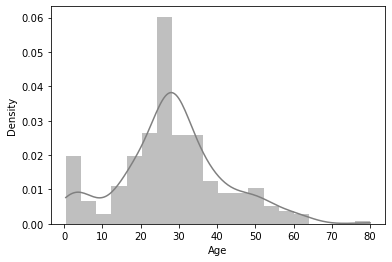

In [139]:
# Distribuição de idades dos sobreviventes
ax = sns.histplot(df[df['Survived']==1].Age, color='gray', kde=True, stat="density", linewidth=0)

In [140]:
# Idade de sobrevivente que mais se repete: 28 anos
df[df['Survived'] == 1].Age.mode()

0    28.0
dtype: float64

In [141]:
# Verificando registros de pessoas 70+ anos
df[df['Survived'] == 1].query('Age > 70')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,male,80.0,0,0,27042,30.0,A23,S


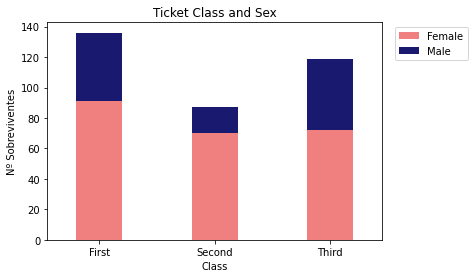

In [142]:
# Número de sobreviventes por classe
df4 = df[df['Survived'] == 1]
df4.groupby('Pclass')['Sex'].value_counts().unstack().plot(kind='bar', stacked = True,  width=0.4, 
                                                           color={'female': 'lightcoral', 'male': 'midnightblue'})
plt.title('Ticket Class and Sex')
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'], rotation='horizontal')
plt.xlabel ('Class')
plt.ylabel ('Nº Sobreviventes')
plt.legend(['Female','Male'], ncol=1, loc='upper right', bbox_to_anchor = (1.27, 1))
plt.show()

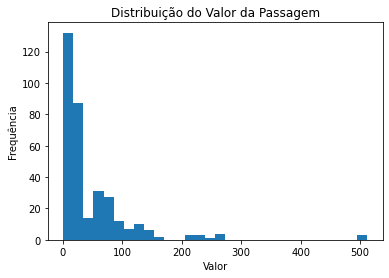

In [143]:
df[df['Survived'] == 1].Fare.plot.hist(bins=30)
plt.title('Distribuição do Valor da Passagem')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

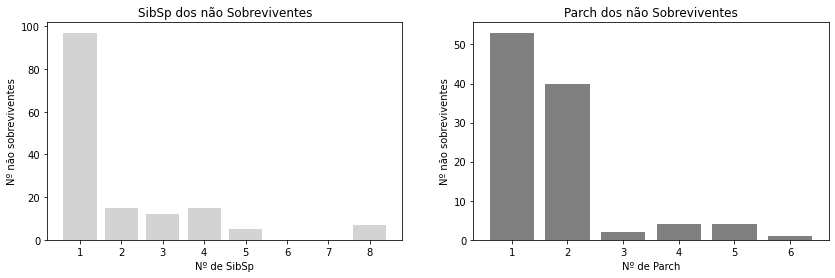

In [144]:
# Número de não sobreviventes que deixaram 1 ou + SibSp e Parch
fig1 = plt.figure(figsize=(14,4))

df2=df[df['Survived'] == 0]

ax1 = fig1.add_subplot (1,2,1)
ax1.bar(df2.query('SibSp >= 1').SibSp.value_counts().index, 
        df2.query('SibSp >= 1').SibSp.value_counts().values, 
        color='lightgray')
ax1.set_title ('SibSp dos não Sobreviventes')
ax1.set_xlabel ('Nº de SibSp')
ax1.set_ylabel ('Nº não sobreviventes')

ax2 = fig1.add_subplot (1,2,2)
ax2.bar(df2.query('Parch >= 1').Parch.value_counts().index, 
        df2.query('Parch >= 1').Parch.value_counts().values, 
        color='gray')
ax2.set_title ('Parch dos não Sobreviventes')
ax2.set_xlabel ('Nº de Parch')
ax2.set_ylabel ('Nº não sobreviventes')


plt.show()

In [145]:
# Função para colocar os rótulos em cima das barras
def rotulos (bars):
    for bar in bars:
        height = bar.get_height()
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.annotate(f'{height}',
                    (label_x_pos, height),
                    xytext=(0, -12),
                    textcoords="offset points",
                    ha='center', 
                    va = 'bottom', 
                    color='white')           

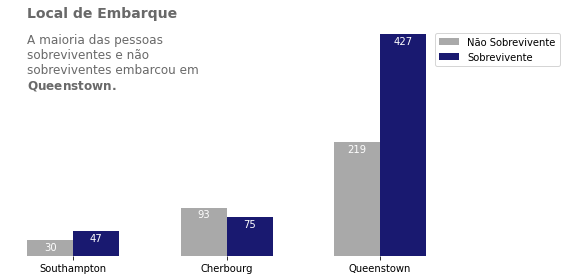

In [146]:
### Local de embarque dos sobreviventes e não sobreviventes ###

# Criar uma figura para o gráfico de barras
fig, ax = plt.subplots(figsize=[8,4])

# Plotar separadamente
barWidth = 0.30
r1 = np.arange(len(df2.Embarked.value_counts()))
r2 = [x + barWidth for x in r1]
barra1= ax.bar(r1, 
               df[df['Survived']==1].Embarked.value_counts().sort_values().values, 
               color='darkgray', 
               width=barWidth, 
               label='Não Sobrevivente' )
barra2 = ax.bar(r2,
                df2.Embarked.value_counts().sort_values().values,
                color='midnightblue', 
                width=barWidth, 
                label='Sobrevivente')
#plt.ylim([0,500])

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo x, y ou todos
#plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
#ax.set_axis_off()

# Adicionar labels das barras
ax.set_xticks([r + barWidth/2 for r in range(len(df2.Embarked.value_counts().index))])
ax.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Adicionar título
plt.title(label='Local de Embarque',
          x=0.216,
          fontdict={'fontsize': 14,
                    'fontweight': 'bold',
                    'color': 'dimgray'})

# Adicionar texto sobre o gráfico
plt.text(x=-0.15, 
         y=430, 
         s='A maioria das pessoas\n'
         'sobreviventes e não\n'
         'sobreviventes embarcou em\n' 
         '$\\bf{Queenstown}.$',
         color='dimgray', 
         verticalalignment='top', 
         fontsize=12)

# Adicionaar legenda
plt.legend(bbox_to_anchor = (1.27, .98))

# Aplicar os rótulos nas barras
rotulos(barra1)
rotulos(barra2)

# Mostrar o gráfico
fig.tight_layout()
plt.show()

In [147]:
# Verificando a correlação das variáveis com a coluna Survived
# Ordenando valores absolutos de forma decrescente
df.corr().Survived.abs().sort_values(ascending=False)

# Pclass e Fare são as variáveis que tem maior correlação
# Ambas as classes tem forte correlação entre si

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

## Preparação dos dados

In [148]:
# Excluindo colunas
df.drop(["PassengerId","Ticket", "Cabin"], 1, inplace=True)

In [149]:
# Modificando variáveis categóricas
df = pd.get_dummies(data = df, columns = ['Pclass', 'Sex', 'Embarked'])

In [150]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,28.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0



### Padronização x Normalização dos dados
#### Alguns algorítmos de aprendizado de máquina são sensíveis ao dimensionamento de recursos. Com escalas diferentes, há uma chance de que uma ponderação mais alta seja dada aos recursos de maior magnitude. Isso pode afetar o desempenho do algoritmo (cria viés).

##### Padronização e Normalização possuem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza

Padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

#### Padronização

In [151]:
import sklearn as sk

In [152]:
# Importa o StandardScaler do scikit-learn
from sklearn.preprocessing import StandardScaler

In [153]:
# Cria objeto que receberá a "regra" de processamento. (Treina)
obj_std = StandardScaler().fit(df)

In [154]:
# Aplica o padronizador nos dados
df_std = obj_std.transform(df)

In [155]:
df_std = pd.DataFrame(df_std)
df_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.789272,-0.565736,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,1.266990,0.663861,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,1.266990,-0.258337,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,1.266990,0.433312,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,-0.789272,0.433312,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.386671,-0.565685,1.960202,-1.107926,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,1.266990,-0.796286,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,-0.789272,-0.104637,0.432793,2.008933,-0.176263,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,1.266990,-0.258337,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,-0.737695,0.737695,2.074505,-0.307562,-1.623803


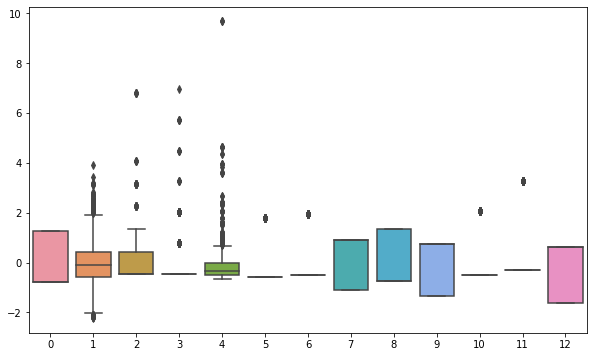

In [179]:
# Visualizando o boxplot dos dados
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_std)

In [180]:
# Média em torno de 0 e desvio padrão em torno de 1
df_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.287732e-16,3.841546e-16,3.456519e-16,6.716164e-17,-4.373606e-17,9.930951e-17,1.413011e-16,-2.925706e-16,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.656854e-01,-5.101515e-01,-1.107926e+00,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-7.892723e-01,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.656854e-01,-5.101515e-01,-1.107926e+00,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,-7.892723e-01,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.656854e-01,-5.101515e-01,9.025874e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,1.266990e+00,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-5.656854e-01,-5.101515e-01,9.025874e-01,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,1.266990e+00,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.767767e+00,1.960202e+00,9.025874e-01,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01


#### Normalização

In [181]:
# Importa o MinMaxScaler do scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [182]:
# Treina o algoritmo e cria o objeto
obj_norm = MinMaxScaler().fit(df)

In [183]:
# Aplica o normalizador
df_norm = obj_norm.transform(df)

In [184]:
df_norm = pd.DataFrame(df_norm)
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


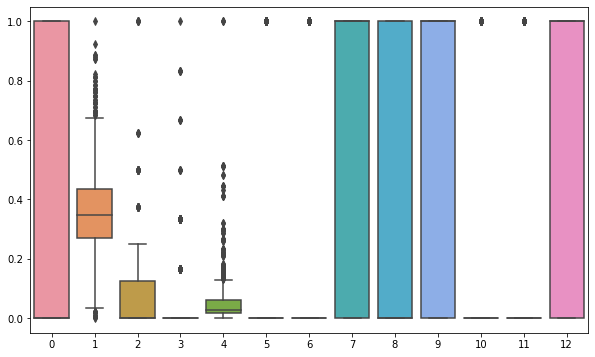

In [185]:
# Visualizando o boxplot dos dados
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_norm)

# Dados entre 0 e 1

In [186]:
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.363679,0.065376,0.063599,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.163605,0.137843,0.134343,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting dataframe original

In [187]:
# Cria dataframe X com todas as colunas, exceto Survived
X = df.drop('Survived', axis=1)

In [188]:
# Cria dataframe Y com dados da coluna Survived
Y = df['Survived']

In [189]:
# Criando dados de treino e de teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 1)

## Algortimos de Machine Learning
### Aplicando GaussianNB

In [190]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [192]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [193]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

### Verificando a exatidão no modelo nos dados de teste

In [194]:
# Importando o pacote accuracy_score
from sklearn.metrics import accuracy_score

In [195]:
# Atibui os resultados a uma variável
resultados = modelo_v1.predict(X_teste)

In [196]:
print("Exatidão (Accuracy): {0:.4f}".format(accuracy_score(Y_teste, resultados)))
print()

Exatidão (Accuracy): 0.7575



### Aplicando RandomForest

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [199]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.7687



### Aplicando Regressão Logística

In [200]:
from sklearn.linear_model import LogisticRegression

In [353]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [202]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()

Exatidão (Accuracy): 0.7761



## Machine Learning com Pipelines 
Criar várias etapas. Para configurações diferentes, testar diversos algoritmos

In [203]:
# Importa o pacote pipeline
from sklearn.pipeline import Pipeline

In [205]:
# Cria os pipelines
pip_std_NB  = Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])

pip_minmax_NB = Pipeline([('minmax', MinMaxScaler()), ('NB', GaussianNB())])

pip_std_RF = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state = 42))])

pip_minmax_RF = Pipeline([('minmax', MinMaxScaler()), ('RF', RandomForestClassifier(random_state = 42))])

pip_std_RL = Pipeline([('scaler', StandardScaler()), ('RL', LogisticRegression(random_state = 42))])

pip_minmax_RL = Pipeline([('minmax', MinMaxScaler()), ('RL', LogisticRegression(random_state = 42))])

### Aplicando MinMaxScaler com NB

In [206]:
# Aplica o pipeline MinMax
pip_minmax_NB.fit(X_treino, Y_treino)

Pipeline(steps=[('minmax', MinMaxScaler()), ('NB', GaussianNB())])

In [207]:
# Imprime o score
pip_minmax_NB.score(X_teste, Y_teste)

0.7574626865671642

### Aplicando StandardScaler com NB

In [208]:
pip_std_NB.fit(X_treino, Y_treino)

Pipeline(steps=[('scaler', StandardScaler()), ('NB', GaussianNB())])

In [209]:
# Imprime o score
pip_std_NB.score(X_teste, Y_teste)

0.7574626865671642

### Aplicando MinMax com RF

In [210]:
# Aplica o pipeline MinMax
pip_minmax_RF.fit(X_treino, Y_treino)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('RF', RandomForestClassifier(random_state=42))])

In [211]:
# Imprime o score
pip_minmax_RF.score(X_teste, Y_teste)

0.7686567164179104

### Aplicando StandardScaler com RF

In [212]:
pip_std_RF.fit(X_treino, Y_treino)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=42))])

In [213]:
pip_std_RF.score(X_teste, Y_teste)

0.7723880597014925

### Aplicando MinMax com RL

In [214]:
# Aplica o pipeline MinMax
pip_minmax_RL.fit(X_treino, Y_treino)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('RL', LogisticRegression(random_state=42))])

In [215]:
# Imprime o score
pip_minmax_RL.score(X_teste, Y_teste)

0.7686567164179104

### Aplicando StandardScaler com RL

In [216]:
pip_std_RL.fit(X_treino, Y_treino)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RL', LogisticRegression(random_state=42))])

In [217]:
pip_std_RL.score(X_teste, Y_teste)

0.7761194029850746

### Escolhendo Regressão Logística com dados sem padronização ou normalização e sem divisão

In [223]:
# Quarta versão do modelo usando Regressão Logística
modelo_v4 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v4.fit(X, Y.ravel())

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

### Carregando dados de teste

In [334]:
# Carregando dados de teste
test = pd.read_csv("test.csv")

In [335]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [336]:
# Verificando se existem valores nulos (resumo)
teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [337]:
# Excluindo coluna Name
test.drop('Name',1, inplace = True)

In [338]:
# Definindo os valores substitutos
# Age: mediana, Cabin: 0 (significando "sem número"), Embarked: moda 
values = {'Age': test.Age.median(), 'Fare': test.Fare.median(), 'Cabin': 0}
values

{'Age': 27.0, 'Fare': 14.4542, 'Cabin': 0}

In [339]:
# Preenchendo missing values com os valores do dict values
test.fillna(value=values, inplace=True)

In [340]:
# Conferindo valores nulos
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [341]:
# Excluindo colunas
test.drop(["Ticket", "Cabin"], 1, inplace=True)

In [342]:
# Modificando variáveis categóricas
test = pd.get_dummies(data = test, columns = ['Pclass', 'Sex', 'Embarked'])

In [343]:
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [344]:
X_test = test.drop('PassengerId', axis=1)

In [346]:
lr_predict_test = modelo_v4.predict(X_test)

In [347]:
sub = pd.Series(lr_predict_test, index=test['PassengerId'], name= "Survived")

In [348]:
sub

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [349]:
sub.to_csv("primeiro_modelo.csv", header=True)